In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
data.reset_index(inplace=True)

In [4]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.495001,16.562924,16.171749,16.185880,147611217
1,2012-01-04,16.566147,16.614982,16.376262,16.485582,114989399
2,2012-01-05,16.336349,16.459304,16.267435,16.413692,131808205
3,2012-01-06,16.113497,16.360893,16.107794,16.339821,108119746
4,2012-01-09,15.430305,16.038633,15.399813,16.026237,233776981
...,...,...,...,...,...,...
2756,2022-12-14,94.860695,96.761695,93.497158,95.089614,26452900
2757,2022-12-15,90.770073,93.586734,90.003706,93.099046,28298800
2758,2022-12-16,90.431671,91.317475,89.585680,90.770065,48485500


In [5]:
ma_100_days = data.Close.rolling(100).mean()

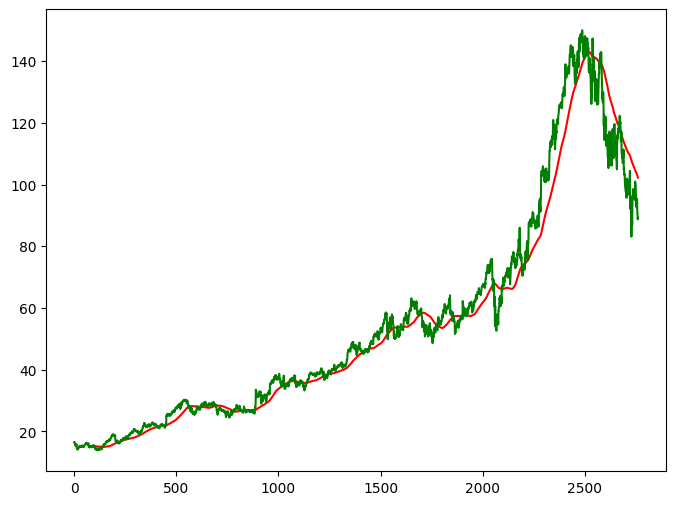

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200_days = data.Close.rolling(200).mean()

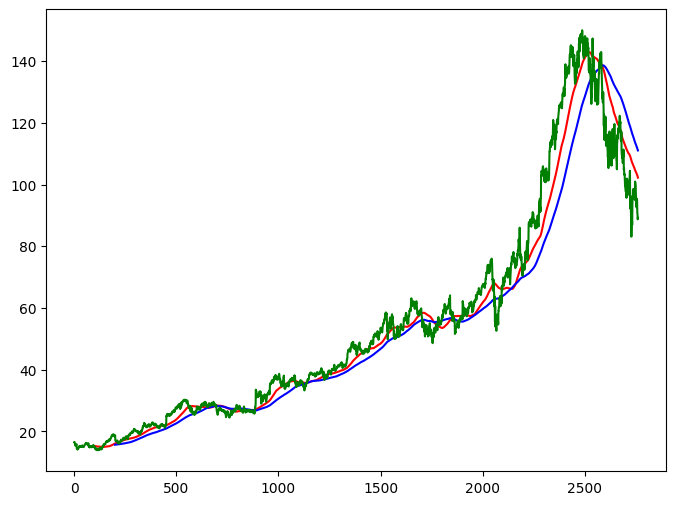

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [11]:
data_train.shape[0]

2208

In [12]:
data_test.shape[0]

553

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scale = scaler.fit_transform(data_train)

In [15]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [19]:
x, y = np.array(x), np.array(y)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [22]:
from keras.models import Sequential
from keras.layers import Input, LSTM, Dropout, Dense

model = Sequential()
model.add(Input(shape=(x.shape[1], 1)))  # Replace input_shape inside LSTM
model.add(LSTM(units=50, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [23]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [24]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 341ms/step - loss: 0.0712
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 336ms/step - loss: 0.0079
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 326ms/step - loss: 0.0071
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 326ms/step - loss: 0.0061
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 22s 328ms/step - loss: 0.0061
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 23s 349ms/step - loss: 0.0049
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 43s 376ms/step - loss: 0.0047
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - loss: 0.0048
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 372ms/step - loss: 0.0044
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 370ms/step - loss: 0.0044
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 384ms/step - loss: 0.0044
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 26s 387ms/step - loss: 0.0041
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 384ms/step - loss: 0.0031
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 41s 386ms/step - loss: 0.0033
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 25s 

In [25]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_6 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [26]:
pas_100_days = data_train.tail(100)

In [27]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [28]:
data_test_scale  =  scaler.fit_transform(data_test)

In [29]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [30]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step


In [31]:
scale =1/scaler.scale_

In [32]:
y_predict = y_predict*scale

In [33]:
y = y*scale

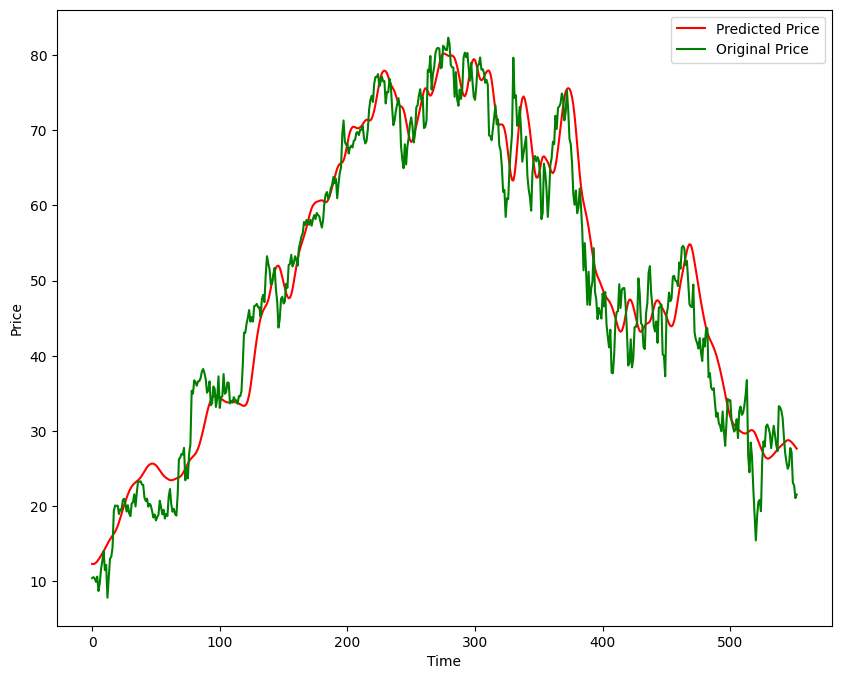

In [34]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [35]:
model.save('Stock Predictions Model.keras')